Silhouette Score AGNES: 0.4466890410285909
Silhouette Score DIANA: 0.44961848359884726
Davies-Bouldin Index AGNES: 0.8034665302876753
Davies-Bouldin Index DIANA: 0.7583583251269742


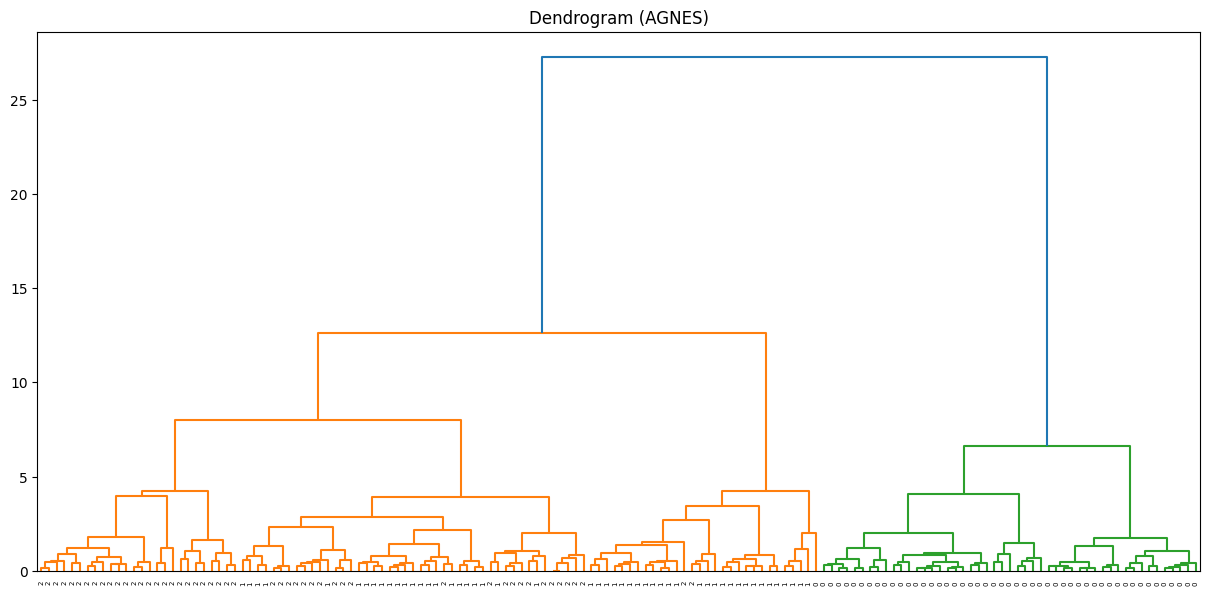

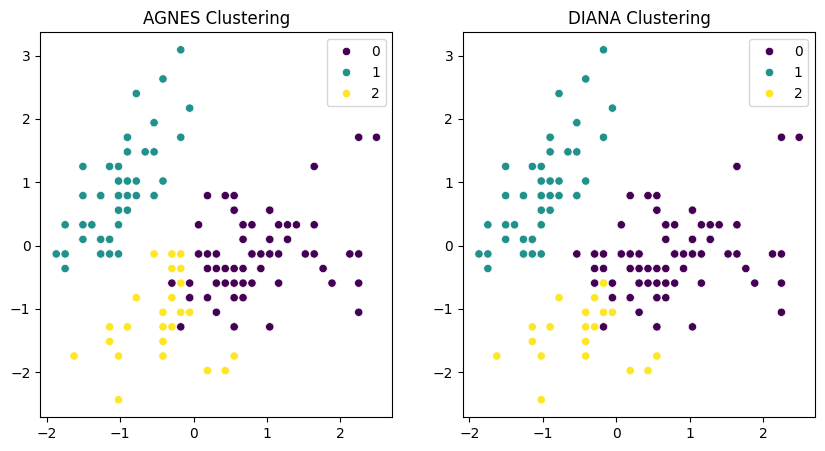

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply AGNES (Agglomerative Nesting)
agnes = AgglomerativeClustering(n_clusters=3, linkage='ward')
agnes_labels = agnes.fit_predict(data_scaled)

# Compute the dissimilarity matrix for DIANA
dissimilarity = squareform(pdist(data_scaled, metric='euclidean'))

# Perform agglomerative clustering on the dissimilarity matrix (as a DIANA approximation)
diana = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='complete')
diana_labels = diana.fit_predict(dissimilarity)

# Performance Evaluation
silhouette_agnes = silhouette_score(data_scaled, agnes_labels)
silhouette_diana = silhouette_score(data_scaled, diana_labels)

dbi_agnes = davies_bouldin_score(data_scaled, agnes_labels)
dbi_diana = davies_bouldin_score(data_scaled, diana_labels)

print(f'Silhouette Score AGNES: {silhouette_agnes}')
print(f'Silhouette Score DIANA: {silhouette_diana}')
print(f'Davies-Bouldin Index AGNES: {dbi_agnes}')
print(f'Davies-Bouldin Index DIANA: {dbi_diana}')

# Visualize Dendrogram for AGNES
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', labels=target, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram (AGNES)')
plt.show()

# Visualize Clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=agnes_labels, palette='viridis')
plt.title('AGNES Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=diana_labels, palette='viridis')
plt.title('DIANA Clustering')

plt.show()